In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../data/custom_preprocess_v2_3.csv')

In [3]:
df.head()

,Unnamed: 0,amount,amount.1,createdAt,recipient_accountNumber,recipient_full_name,sender_full_name,reviewed,reported,day,...,scaled_daily_average_tx_amount_of_recipient_accNumber,scaled_weekly_average_tx_count_of_recipient,scaled_weekly_average_tx_count_of_sender,scaled_weekly_average_tx_count_of_recipient_accNumber,scaled_monthly_average_tx_count_of_recipient,scaled_monthly_average_tx_count_of_sender,scaled_monthly_average_tx_count_of_recipient_accNumber,scaled_daily_average_tx_count_of_recipient,scaled_daily_average_tx_count_of_sender,scaled_daily_average_tx_count_of_recipient_accNumber
0,0,476.86,425.20,2023-09-14,3b681d83ccee97f33b3e,Stephen Small,Stephen Small,False,False,14,...,0.000158,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,1,700.00,714.80,2023-09-14,22386743d148e118584d,Matthew Gilbert,Matthew Gilbert,False,False,14,...,0.000232,0.016129,0.016129,0.000000,0.011765,0.011765,0.000000,0.0,0.0,0.0
2,2,30.00,31.14,2023-09-14,e2c2800b47b605016ee8,Peter Watkins,Peter Watkins,False,False,14,...,0.000010,0.016129,0.016129,0.016129,0.005882,0.005882,0.005882,0.0,0.0,0.0
3,3,550.00,629.66,2023-09-14,4937ff8c2964230a207d,Cindy Larson,Patricia Brown,False,False,14,...,0.000183,0.016129,0.016129,0.016129,0.017647,0.017647,0.017647,0.0,0.0,0.0
4,4,2285.25,2052.09,2023-09-14,2d3d71ee832ada40ce63,Patricia Ford,Patricia Ford,False,False,14,...,0.000759,0.000000,0.000000,0.000000,0.005882,0.005882,0.005882,0.0,0.0,0.0


In [4]:
df.columns

Index(['Unnamed: 0', 'amount', 'amount.1', 'createdAt',
       'recipient_accountNumber', 'recipient_full_name', 'sender_full_name',
       'reviewed', 'reported', 'day',
       ...
       'scaled_daily_average_tx_amount_of_recipient_accNumber',
       'scaled_weekly_average_tx_count_of_recipient',
       'scaled_weekly_average_tx_count_of_sender',
       'scaled_weekly_average_tx_count_of_recipient_accNumber',
       'scaled_monthly_average_tx_count_of_recipient',
       'scaled_monthly_average_tx_count_of_sender',
       'scaled_monthly_average_tx_count_of_recipient_accNumber',
       'scaled_daily_average_tx_count_of_recipient',
       'scaled_daily_average_tx_count_of_sender',
       'scaled_daily_average_tx_count_of_recipient_accNumber'],
      dtype='object', length=101)

In [5]:
# drop columns
df.drop(['Unnamed: 0', 'amount', ], axis=1, inplace=True)

In [6]:
df.rename(columns={'amount.1': 'amount'}, inplace=True)

<Axes: >

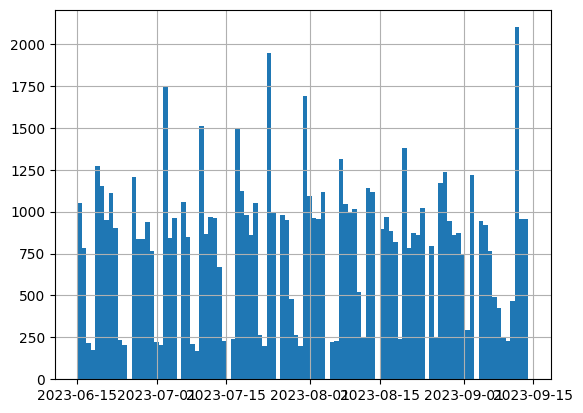

In [7]:
import matplotlib.pyplot as plt

# hist plot total amount overe time
df['createdAt'] = pd.to_datetime(df['createdAt'])

df['createdAt'].hist(bins=100)

/var/folders/l0/myv4vn5x1tq6rttc145y03180000gn/T/ipykernel_10234/2460128008.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week'] = df['createdAt'].dt.week


<Axes: >

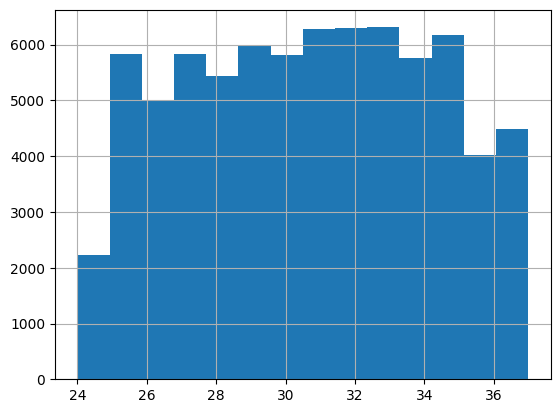

In [8]:
# hist plot total amount overe week
df['week'] = df['createdAt'].dt.week

df['week'].hist(bins=14)

<Axes: >

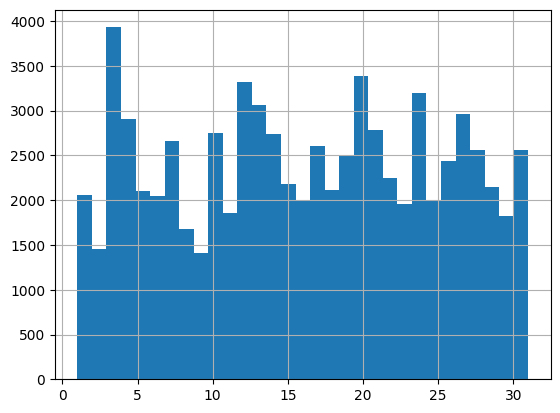

In [9]:
# hist plot total amount over days
df['day'] = df['createdAt'].dt.day

df['day'].hist(bins=31)

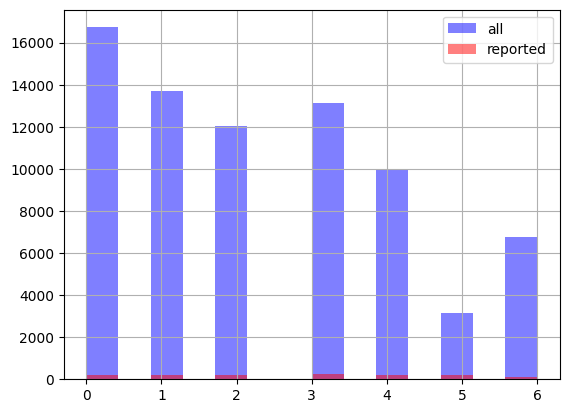

In [10]:
# hist plot total amount over week days (0 = Monday, 6 = Sunday) and hue by reported
df['weekday'] = df['createdAt'].dt.weekday

df['weekday'].hist(bins=7 * 2, alpha=0.5, color='blue', label='all')
df[df['reported'] == True]['weekday'].hist(bins=7 * 2, alpha=0.5, color='red', label='reported')
plt.legend()

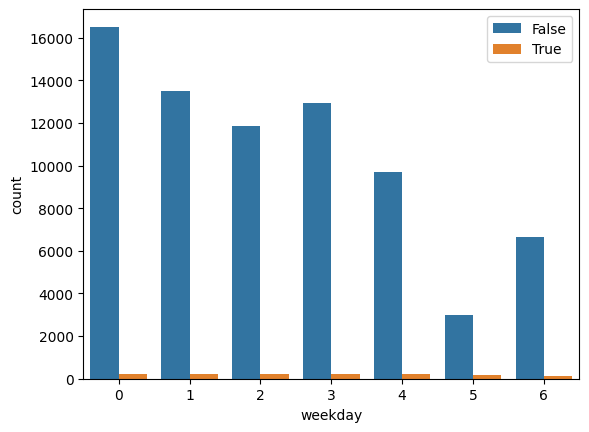

In [11]:
import seaborn as sns

# hist plot total amount over week days (0 = Monday, 6 = Sunday) and hue by reported
sns.countplot(x='weekday', hue='reported', data=df)
plt.legend()
plt.show()

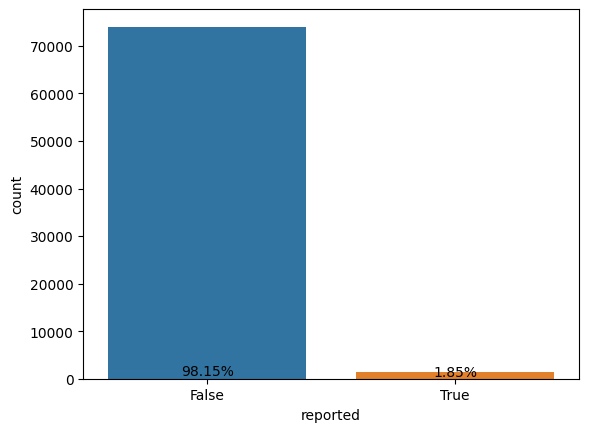

In [30]:
value_counts = df['reported'].value_counts(normalize=True) * 100

# Create the count plot
sns.countplot(x='reported', data=df)

# Add percentages on top of the bars
for index, value in enumerate(value_counts):
    plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom')

plt.savefig('../images/reported_count.png')
plt.show()

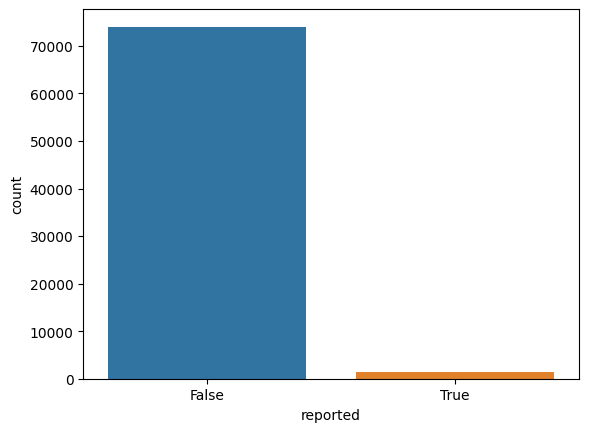

In [12]:
# count plot if reported or not with percentage

df['reported'].value_counts(normalize=True)

sns.countplot(x='reported', data=df)
plt.savefig('../images/reported_count.png')
plt.show()

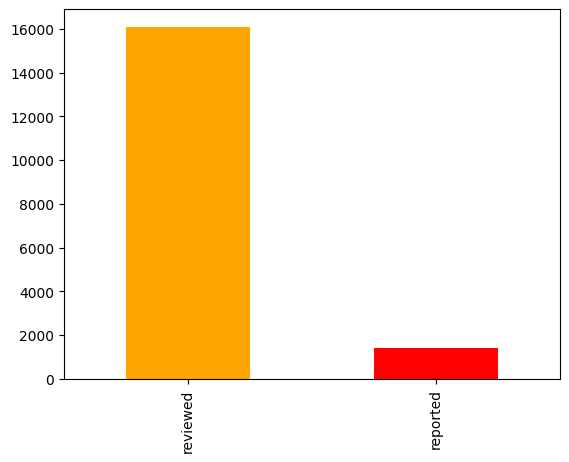

In [71]:
import matplotlib.pyplot as plt


review_report = df[['reviewed', 'reported']].sum()
review_report.plot(kind='bar',  color=['orange', 'red'])
plt.savefig('../images/review_report.png')

In [75]:
df

,amount,createdAt,recipient_accountNumber,recipient_full_name,sender_full_name,reviewed,reported,day,month,year,...,scaled_weekly_average_tx_count_of_sender,scaled_weekly_average_tx_count_of_recipient_accNumber,scaled_monthly_average_tx_count_of_recipient,scaled_monthly_average_tx_count_of_sender,scaled_monthly_average_tx_count_of_recipient_accNumber,scaled_daily_average_tx_count_of_recipient,scaled_daily_average_tx_count_of_sender,scaled_daily_average_tx_count_of_recipient_accNumber,week,weekday
0,425.20,2023-09-14,3b681d83ccee97f33b3e,Stephen Small,Stephen Small,False,False,14,9,2023,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37,Thursday
1,714.80,2023-09-14,22386743d148e118584d,Matthew Gilbert,Matthew Gilbert,False,False,14,9,2023,...,0.016129,0.000000,0.011765,0.011765,0.000000,0.000000,0.000000,0.000000,37,Thursday
2,31.14,2023-09-14,e2c2800b47b605016ee8,Peter Watkins,Peter Watkins,False,False,14,9,2023,...,0.016129,0.016129,0.005882,0.005882,0.005882,0.000000,0.000000,0.000000,37,Thursday
3,629.66,2023-09-14,4937ff8c2964230a207d,Cindy Larson,Patricia Brown,False,False,14,9,2023,...,0.016129,0.016129,0.017647,0.017647,0.017647,0.000000,0.000000,0.000000,37,Thursday
4,2052.09,2023-09-14,2d3d71ee832ada40ce63,Patricia Ford,Patricia Ford,False,False,14,9,2023,...,0.000000,0.000000,0.005882,0.005882,0.005882,0.000000,0.000000,0.000000,37,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75438,104.67,2023-06-15,242d39ff5a44321d4f6f,Nancy Taylor,Nancy Taylor,True,False,15,6,2023,...,0.000000,0.000000,0.017647,0.017647,0.017647,0.000000,0.000000,0.000000,24,Thursday
75439,966.63,2023-06-15,4a8bb17b8f2b28ddaffc,Dr. Dylan Mitchell,Dr. Dylan Mitchell,True,False,15,6,2023,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24,Thursday
75440,218.24,2023-06-15,503bba37df5ffc72eea0,Lisa Murphy,Lisa Murphy,True,False,15,6,2023,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24,Thursday
75441,324.97,2023-06-15,6f0ed9c6d1380cf32123,Todd Byrd,Todd Byrd,False,False,15,6,2023,...,0.016129,0.016129,0.017647,0.017647,0.017647,0.045455,0.045455,0.045455,24,Thursday


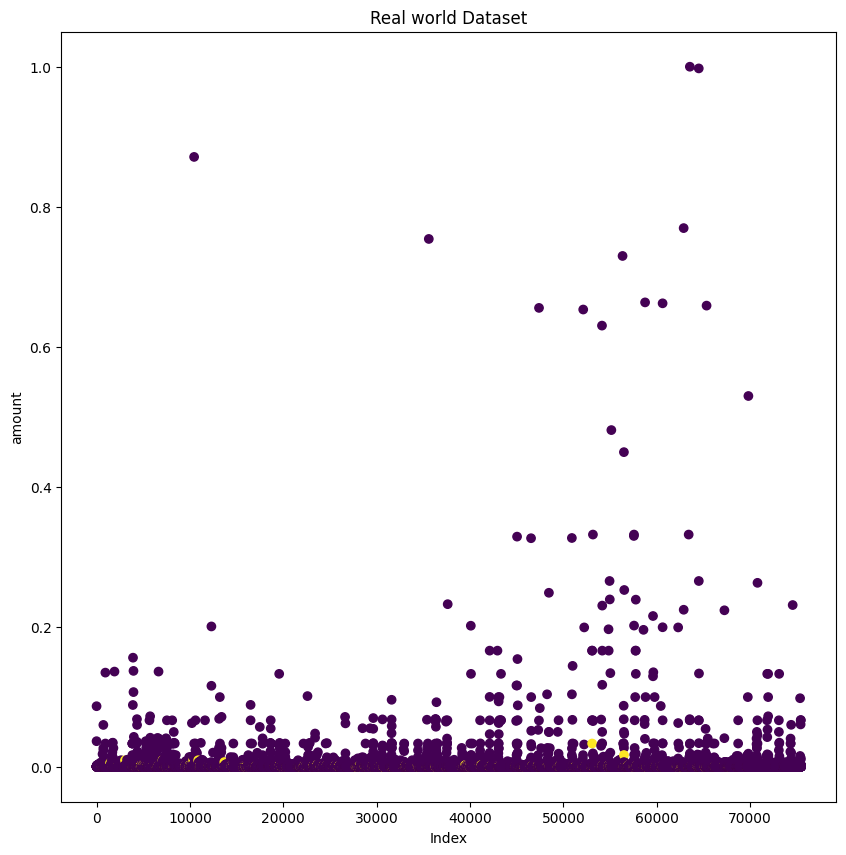

In [29]:
plt.figure(figsize=(10,10))
plt.scatter(df.index, df['scaled_amount'], c=df['reported'])
plt.xlabel('Index')
plt.ylabel('amount')
plt.title('Real world Dataset')
plt.savefig('../images/amount_over_time.png')
plt.show()

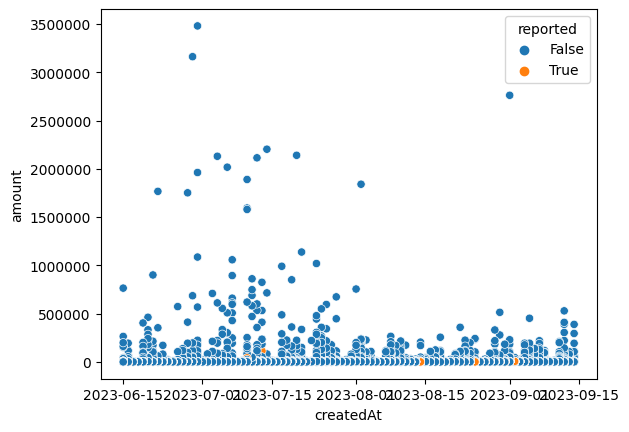

In [24]:
# scatter plot of amount over time, not in e notation
plt.ticklabel_format(style='plain', axis='y')
sns.scatterplot(x='createdAt', y='amount', hue='reported', data=df)
plt.savefig('../images/amount_over_time.png')
plt.show()

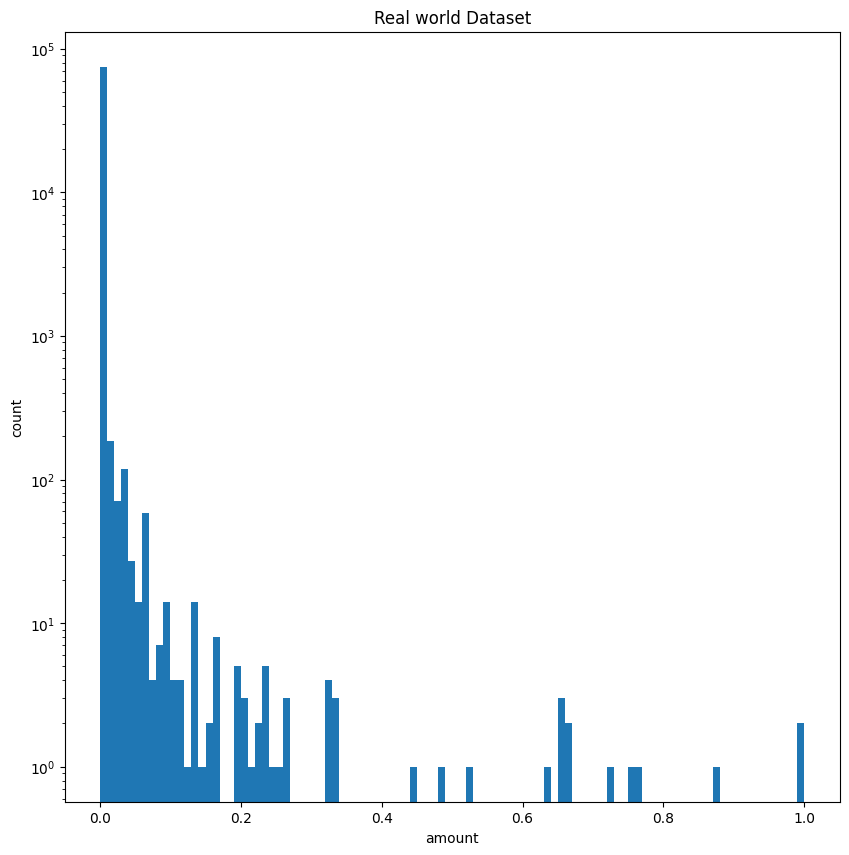

In [40]:
# amount distribution with log scale
plt.figure(figsize=(10,10))
plt.hist(df['scaled_amount'], bins=100, log=True)
plt.yscale('log')
plt.xlabel('amount')
plt.ylabel('count')
plt.title('Real world Dataset')
# plt.savefig('../images/amount_distribution.png')
plt.show()

<Axes: xlabel='createdAt', ylabel='amount'>

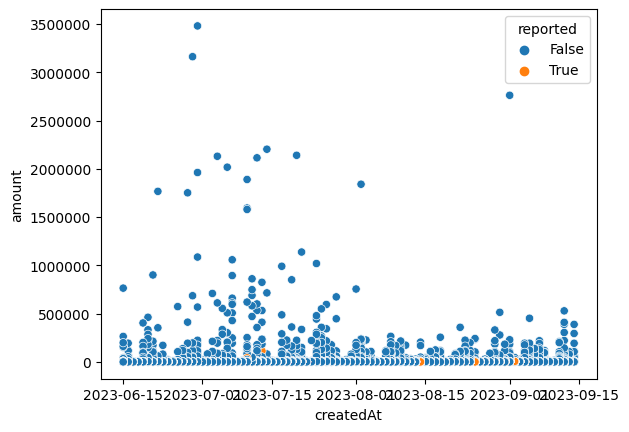

In [23]:
# scatter plot of amount over time, not in e notation
plt.ticklabel_format(style='plain', axis='y')
sns.scatterplot(x='createdAt', y='amount', hue='reported', data=df)
plt.savefig('../images/amount_over_time.png')
plt.show()

In [43]:
columns = ['scaled_daily_tx_count_of_recipient', 'scaled_daily_tx_count_of_sender',
       'scaled_daily_tx_count_of_recipient_accNumber',
       'scaled_weekly_tx_count_of_recipient',
       'scaled_weekly_tx_count_of_sender',
       'scaled_weekly_tx_count_of_recipient_accNumber',
       'scaled_monthly_tx_count_of_recipient',
       'scaled_monthly_tx_count_of_sender',
       'scaled_monthly_tx_count_of_recipient_accNumber',
       'scaled_recipient_acc_per_recipient_name',
       'scaled_sender_per_recipient_name',
       'scaled_weekly_tx_amount_of_recipient',
       'scaled_weekly_tx_amount_of_sender',
       'scaled_weekly_tx_amount_of_recipient_accNumber',
       'scaled_monthly_tx_amount_of_recipient',
       'scaled_monthly_tx_amount_of_sender',
       'scaled_monthly_tx_amount_of_recipient_accNumber',
       'scaled_daily_tx_amount_of_recipient',
       'scaled_daily_tx_amount_of_sender',
       'scaled_daily_tx_amount_of_recipient_accNumber',
       'scaled_weekly_average_tx_amount_of_recipient',
       'scaled_weekly_average_tx_amount_of_sender',
       'scaled_weekly_average_tx_amount_of_recipient_accNumber',
       'scaled_monthly_average_tx_amount_of_recipient',
       'scaled_monthly_average_tx_amount_of_sender',
       'scaled_monthly_average_tx_amount_of_recipient_accNumber',
       'scaled_daily_average_tx_amount_of_recipient',
       'scaled_daily_average_tx_amount_of_sender',
       'scaled_daily_average_tx_amount_of_recipient_accNumber',
       'scaled_weekly_average_tx_count_of_recipient',
       'scaled_weekly_average_tx_count_of_sender',
       'scaled_weekly_average_tx_count_of_recipient_accNumber',
       'scaled_monthly_average_tx_count_of_recipient',
       'scaled_monthly_average_tx_count_of_sender',
       'scaled_monthly_average_tx_count_of_recipient_accNumber',
       'scaled_daily_average_tx_count_of_recipient',
       'scaled_daily_average_tx_count_of_sender',
       'scaled_daily_average_tx_count_of_recipient_accNumber']

In [49]:
cols_for_corr = ['scaled_amount',  'log_amount', 'reported', 'day_of_week', 'is_weekend', 'daily_tx_count_of_recipient',
    'daily_tx_count_of_sender', 'daily_tx_count_of_recipient_accNumber', 'weekly_tx_count_of_recipient',
    'weekly_tx_count_of_sender', 'weekly_tx_count_of_recipient_accNumber', 'monthly_tx_count_of_recipient',
    'monthly_tx_count_of_sender', 'monthly_tx_count_of_recipient_accNumber', 'recipient_acc_per_recipient_name',
    'sender_per_recipient_name']

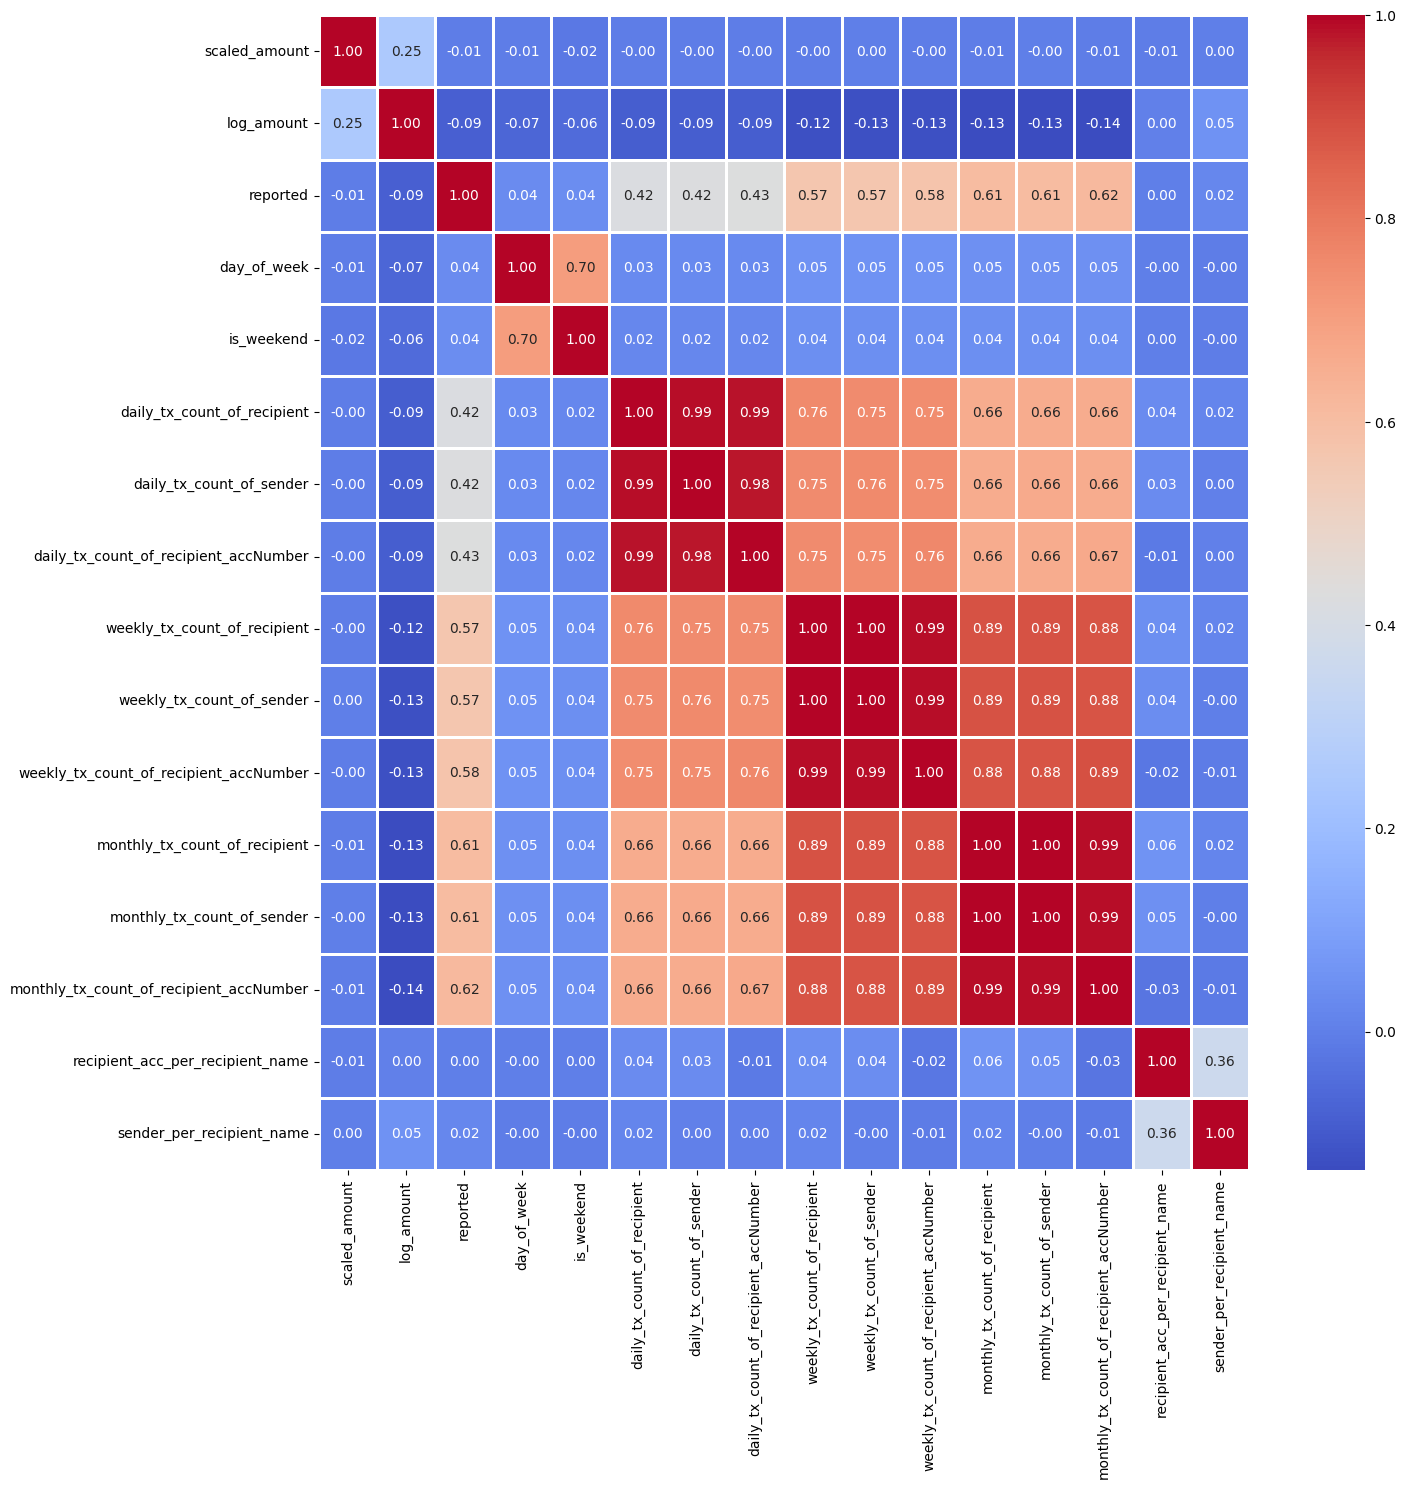

In [58]:
# correlation matrix
corr = df[cols_for_corr].corr()


# plot correlation matrix, also add the correlation values
plt.figure(figsize=(15, 15))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', linewidths=2)
plt.savefig('../images/correlation_matrix.png', bbox_inches='tight')
plt.show()

In [83]:
# do PCA for all numeric columns
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
# fit transform and add to df as two new columns
df['pca1'] = pca.fit_transform(df[columns])[:, 0]
df['pca2'] = pca.fit_transform(df[columns])[:, 1]

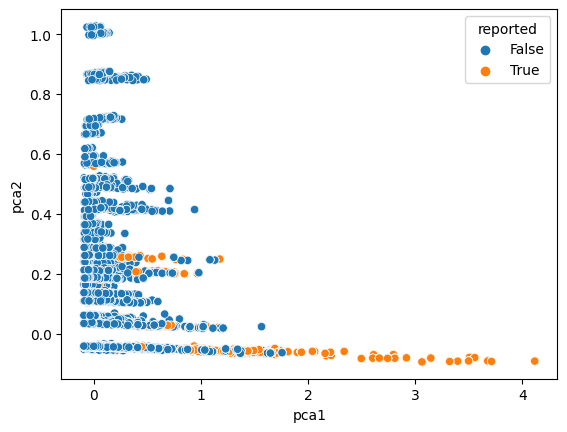

In [86]:
import seaborn as sn

sn.scatterplot(x='pca1', y='pca2', hue='reported', data=df)
plt.savefig('../images/pca.png')
plt.show()

In [88]:
# do tsne for all numeric columns
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
# fit transform and add to df as two new columns
tsne_results = tsne.fit_transform(df[columns])
df['tsne1'] = tsne_results[:, 0]
df['tsne2'] = tsne_results[:, 1]

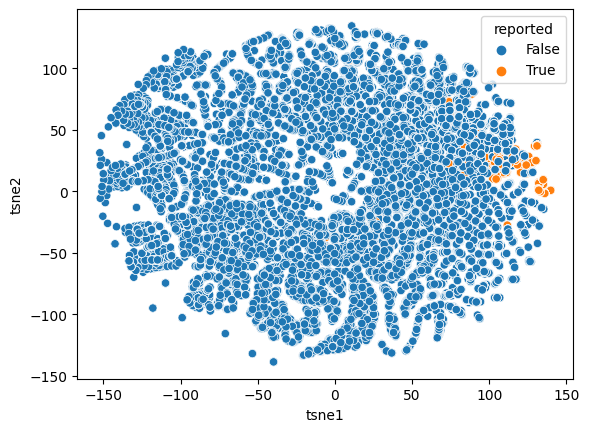

In [89]:
# plot tsne
sn.scatterplot(x='tsne1', y='tsne2', hue='reported', data=df)
plt.savefig('../images/tsne_reported.png')
plt.show()

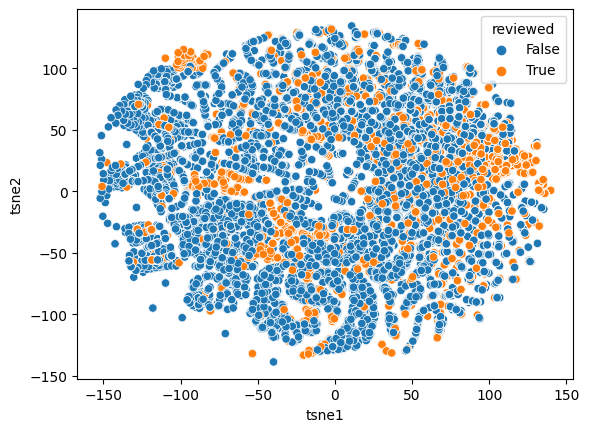

In [90]:
# plot tsne
sn.scatterplot(x='tsne1', y='tsne2', hue='reviewed', data=df)
plt.savefig('../images/tsne_reviewed.png')
plt.show()

In [60]:
# label weekdays from numbers to names
df['weekday'] = df['weekday'].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday',
                                   5: 'Saturday', 6: 'Sunday'})

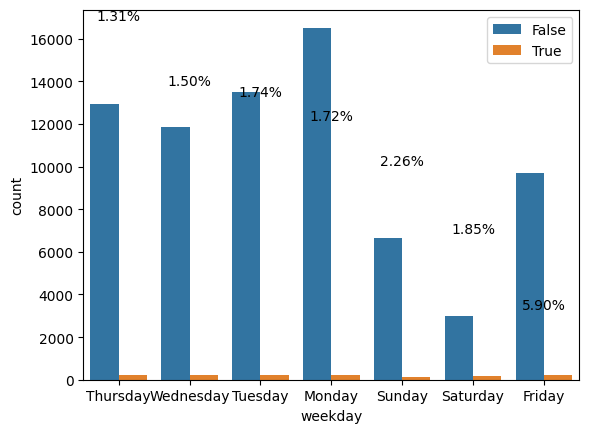

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# hist plot total amount over weekdays and show percentages of reported groups
sns.countplot(x='weekday', hue='reported', data=df)
plt.legend()

# Calculate the percentages of reported groups
total_counts = df['weekday'].value_counts()
reported_counts = df[df['reported'] == True]['weekday'].value_counts()
percentages = (reported_counts / total_counts) * 100

# # Add percentage labels to the plot
# for i, p in enumerate(plt.gca().patches):
#     height = p.get_height()
#     plt.gca().text(p.get_x() + p.get_width() / 2, height + 5, f"{percentages[i]:.2f}%", ha='center')

for i in range(len(total_counts)):
    weekday = total_counts.index[i]
    percentage = percentages.get(weekday, 0)
    count = total_counts[weekday]
    plt.gca().text(i, count, f"{percentage:.2f}%", ha='center', va='bottom')

plt.show()

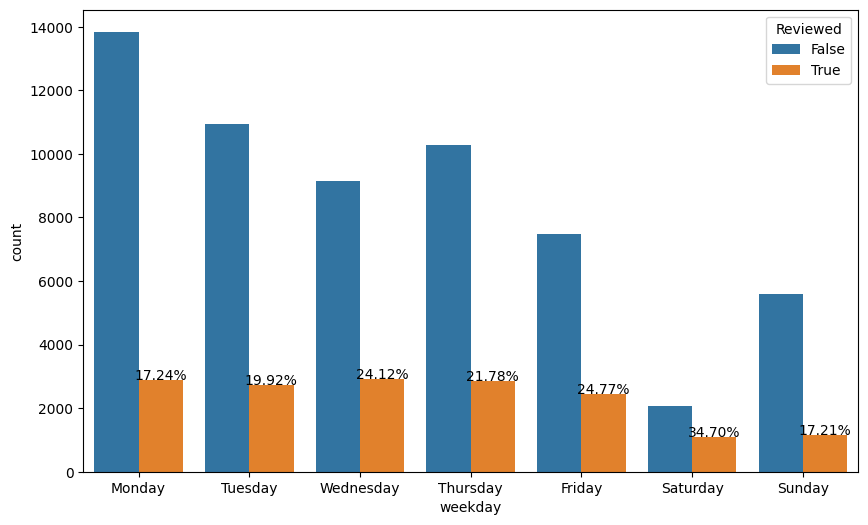

In [92]:
# Correcting the code to sort the histogram by weekdays from Monday to Sunday

# Defining the weekday order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Sorting the dataframe by this specific weekday order
df['weekday'] = pd.Categorical(df['weekday'], categories=weekday_order, ordered=True)

# Re-creating the plot with sorted weekdays
plt.figure(figsize=(10, 6))
sns.countplot(x='weekday', hue='reviewed', data=df)
plt.legend(title='Reviewed', loc='upper right')

# Calculate the total and reviewed counts again
total_counts = df['weekday'].value_counts().sort_index()
reviewed_counts = df[df['reviewed'] == True]['weekday'].value_counts().sort_index()
percentages = (reviewed_counts / total_counts) * 100

# Get the positions of the bars
patches = plt.gca().patches
half_bar_width = patches[0].get_width() / 2

# Add percentage labels above the 'True' reviewed bars
for i, weekday in enumerate(weekday_order):
    # Find the patch (bar) for 'True' reviewed value
    for p in patches:
        if p.get_x() < i + half_bar_width and p.get_x() > i - half_bar_width and p.get_height() > 0:
            # Position the text above this bar
            percentage = percentages.get(weekday, 0)
            plt.gca().text(p.get_x() + p.get_width() / 2, p.get_height() + 3, f"{percentage:.2f}%", ha='center')
            break  # Move to the next weekday after placing the text
plt.savefig('../images/weekday_reviewed.png')
plt.show()

In [62]:
df.head().T

,0,1,2,3,4
amount,425.2,714.8,31.14,629.66,2052.09
createdAt,2023-09-14 00:00:00,2023-09-14 00:00:00,2023-09-14 00:00:00,2023-09-14 00:00:00,2023-09-14 00:00:00
recipient_accountNumber,3b681d83ccee97f33b3e,22386743d148e118584d,e2c2800b47b605016ee8,4937ff8c2964230a207d,2d3d71ee832ada40ce63
recipient_full_name,Stephen Small,Matthew Gilbert,Peter Watkins,Cindy Larson,Patricia Ford
sender_full_name,Stephen Small,Matthew Gilbert,Peter Watkins,Patricia Brown,Patricia Ford
...,...,...,...,...,...
scaled_daily_average_tx_count_of_recipient,0.0,0.0,0.0,0.0,0.0
scaled_daily_average_tx_count_of_sender,0.0,0.0,0.0,0.0,0.0
scaled_daily_average_tx_count_of_recipient_accNumber,0.0,0.0,0.0,0.0,0.0
week,37,37,37,37,37


In [15]:
print(df['scaled_amount'].describe())

count    75443.000000
mean         0.000912
std          0.012064
min          0.000000
25%          0.000076
50%          0.000166
75%          0.000398
max          1.000000
Name: scaled_amount, dtype: float64


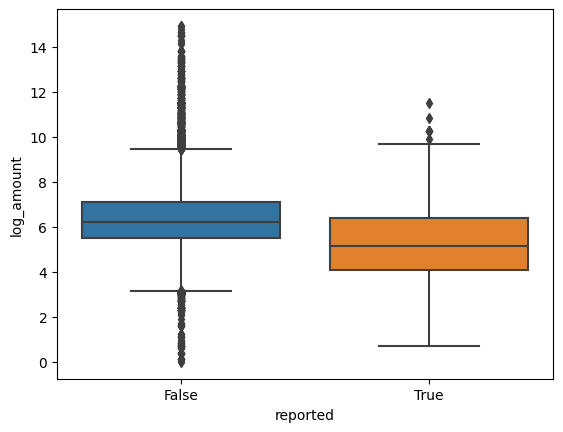

In [16]:
# violun plot total amount by reported
sns.boxplot(x='reported', y='log_amount', data=df)
plt.show()

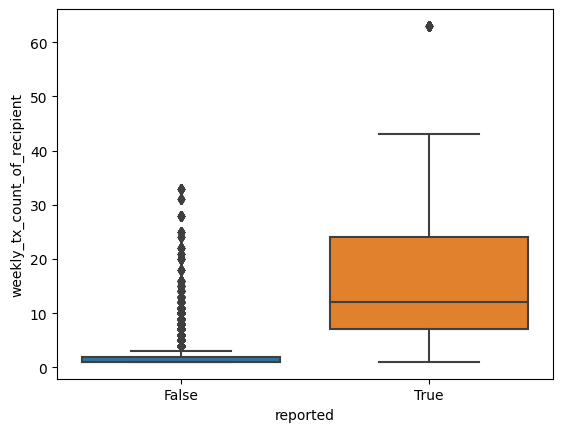

In [17]:
# violun plot total amount by reported
sns.boxplot(x='reported', y='weekly_tx_count_of_recipient', data=df)
plt.show()

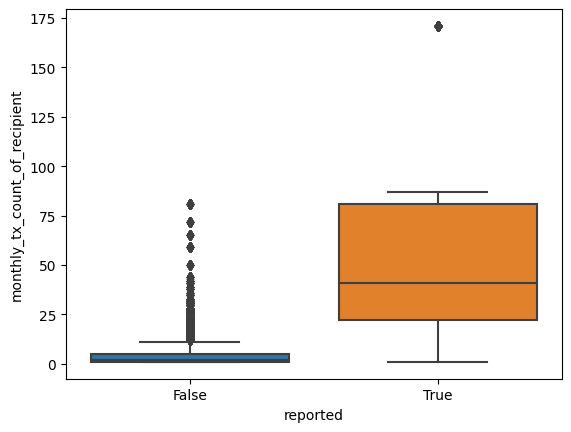

In [18]:
# violun plot total amount by reported
sns.boxplot(x='reported', y='monthly_tx_count_of_recipient', data=df)
# save plot
plt.savefig('../images/boxplot_monthly_tx_count_of_recipient.png')
plt.show()

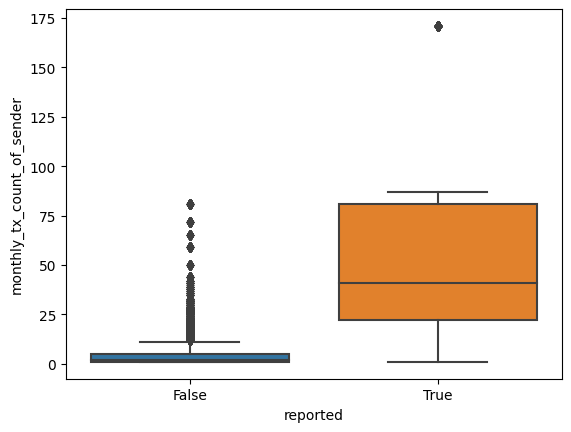

In [34]:
# violun plot total amount by reported
sns.boxplot(x='reported', y='monthly_tx_count_of_sender', data=df)
# save plot
plt.savefig('../images/boxplot_monthly_tx_count_of_sender.png')
plt.show()

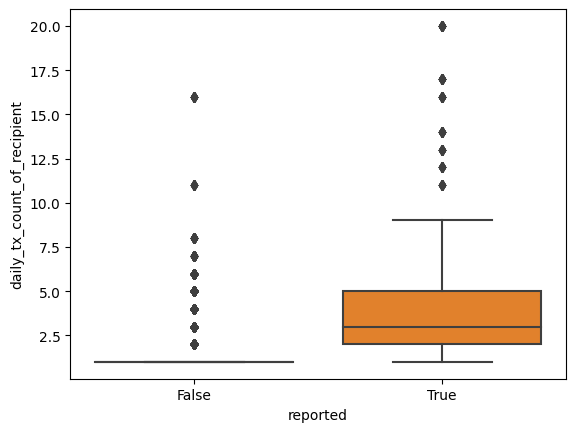

In [42]:
# violun plot total amount by reported
sns.boxplot(x='reported', y='daily_tx_count_of_recipient', data=df)
plt.savefig('../images/boxplot_daily_tx_count_of_recipient.png')
plt.show()

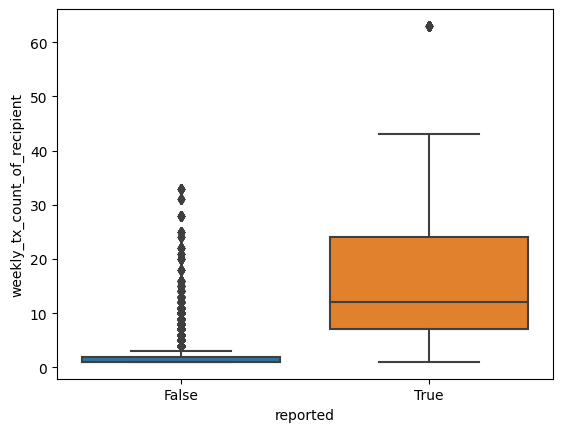

In [43]:
# violun plot total amount by reported
sns.boxplot(x='reported', y='weekly_tx_count_of_recipient', data=df)
plt.savefig('../images/boxplot_weekly_tx_count_of_recipient.png')
plt.show()

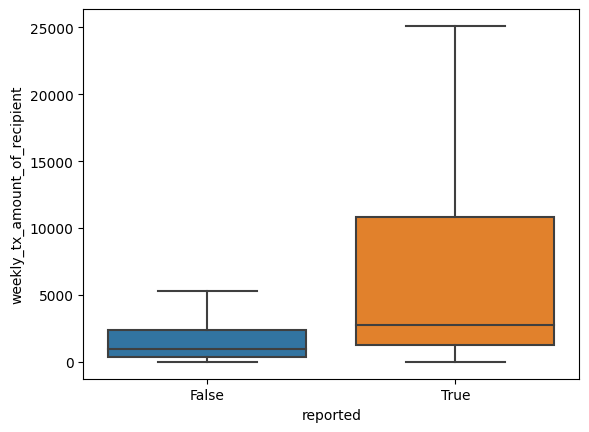

In [45]:
# don't show outliers
sns.boxplot(x='reported', y='weekly_tx_amount_of_recipient', data=df, showfliers=False)
plt.savefig('../images/boxplot_weekly_tx_amount_of_recipient.png')
plt.show()

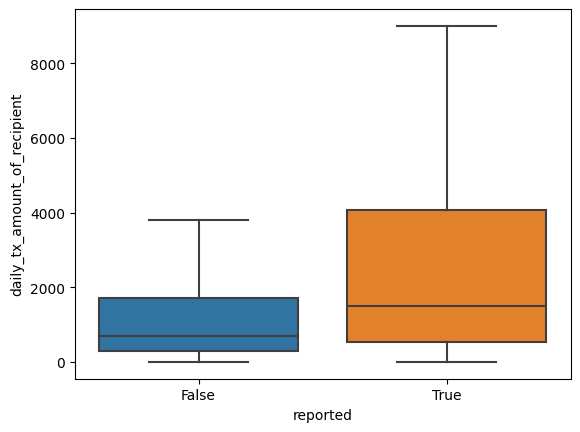

In [46]:

sns.boxplot(x='reported', y='daily_tx_amount_of_recipient', data=df, showfliers=False)
plt.savefig('../images/boxplot_daily_tx_amount_of_recipient.png')
plt.show()

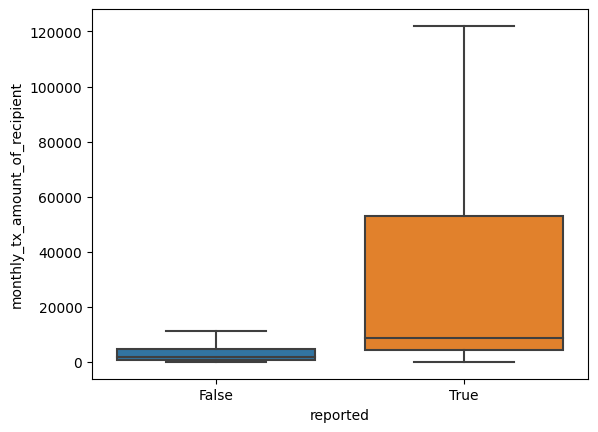

In [47]:
sns.boxplot(x='reported', y='monthly_tx_amount_of_recipient', data=df, showfliers=False)
plt.savefig('../images/boxplot_monthly_tx_amount_of_recipient.png')
plt.show()

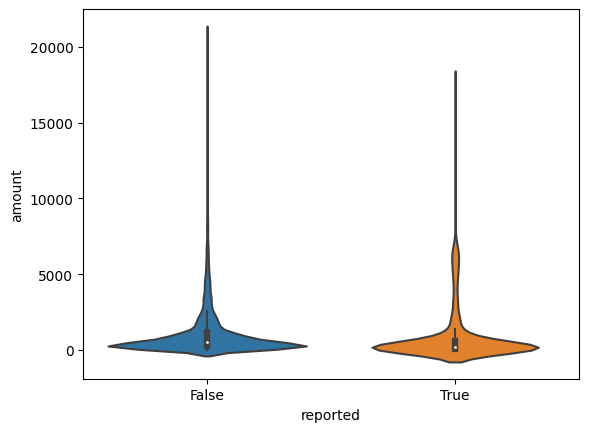

In [19]:
# violun plot total amount by reported
# drop outliers which are top 1 percent
df_out = df[df['amount'] < df['amount'].quantile(0.99)]
sns.violinplot(x='reported', y='amount', data=df_out)
plt.show()

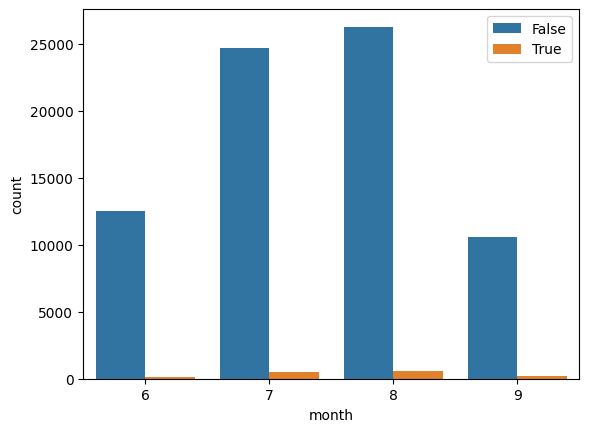

In [79]:
# hist plot total amount over week days (0 = Monday, 6 = Sunday) and hue by reported
sns.countplot(x='month', hue='reported', data=df)
plt.legend()
plt.show()

In [33]:
print(df[['sender_per_recipient_name', 'reported']].value_counts())

sender_per_recipient_name  reported
1                          False       70242
2                          False        3291
1                          True         1268
3                          False         420
2                          True          123
4                          False          85
5                          False           9
                           True            3
3                          True            2
dtype: int64


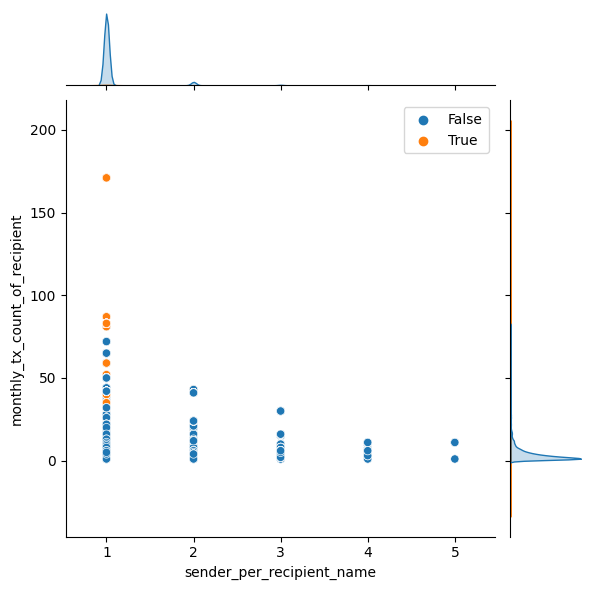

In [26]:
# hist plot total amount over week days (0 = Monday, 6 = Sunday) and hue by reported
sns.jointplot(x='sender_per_recipient_name',  y='monthly_tx_count_of_recipient', hue='reported', data=df)
plt.legend()
plt.show()

/var/folders/l0/myv4vn5x1tq6rttc145y03180000gn/T/ipykernel_4972/1816066187.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


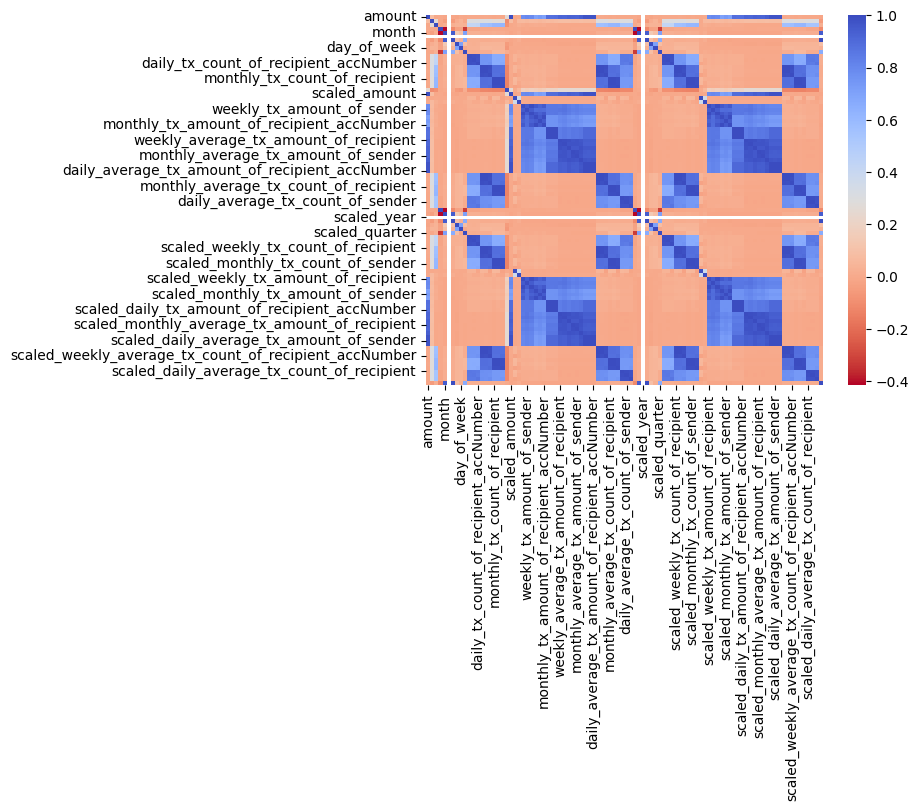

In [52]:
# find correlation between features reported and all others features
corr = df.corr()
corr

# plot correlation
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size': 20})
plt.show()

In [21]:
for i in df.columns:
    print(i)

amount
createdAt
recipient_accountNumber
recipient_full_name
sender_full_name
reviewed
reported
day
month
year
weekofyear
is_weekend
day_of_week
quarter
daily_tx_count_of_recipient
daily_tx_count_of_sender
daily_tx_count_of_recipient_accNumber
weekly_tx_count_of_recipient
weekly_tx_count_of_sender
weekly_tx_count_of_recipient_accNumber
monthly_tx_count_of_recipient
monthly_tx_count_of_sender
monthly_tx_count_of_recipient_accNumber
log_amount
scaled_amount
recipient_acc_per_recipient_name
sender_per_recipient_name
weekly_tx_amount_of_recipient
weekly_tx_amount_of_sender
weekly_tx_amount_of_recipient_accNumber
monthly_tx_amount_of_recipient
monthly_tx_amount_of_sender
monthly_tx_amount_of_recipient_accNumber
daily_tx_amount_of_recipient
daily_tx_amount_of_sender
daily_tx_amount_of_recipient_accNumber
weekly_average_tx_amount_of_recipient
weekly_average_tx_amount_of_sender
weekly_average_tx_amount_of_recipient_accNumber
monthly_average_tx_amount_of_recipient
monthly_average_tx_amount_of_s

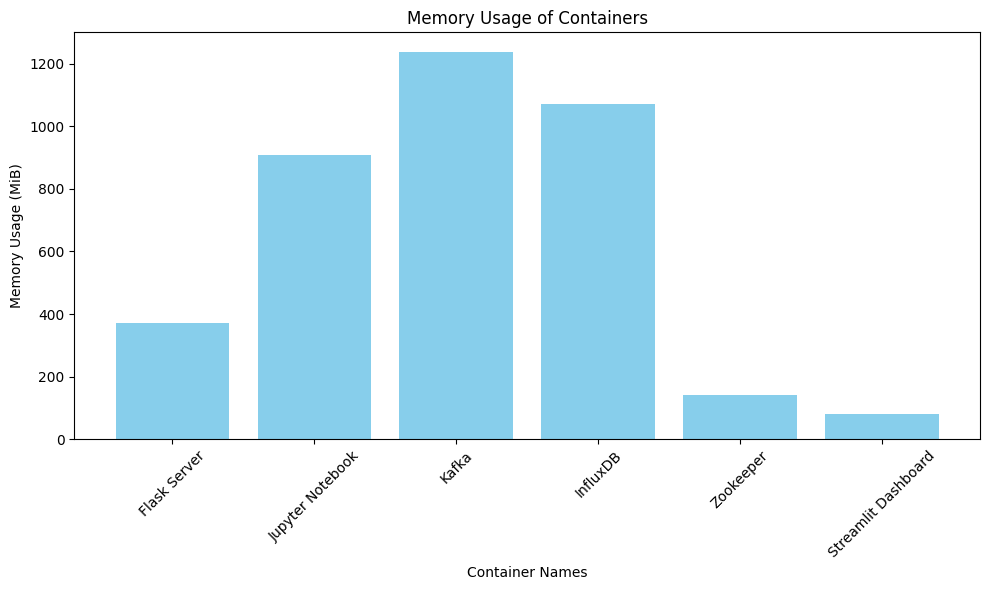

In [7]:
import matplotlib.pyplot as plt

# Memory usage data in MiB
memory_usage = [370.4, 907.5, 1238, 1071, 142.7, 79.75]

# Container names
container_names = ['Flask Server', 'Jupyter Notebook', 'Kafka', 
                'InfluxDB', 'Zookeeper', 'Streamlit Dashboard']

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(container_names, memory_usage, color='skyblue')
plt.xlabel('Container Names')
plt.ylabel('Memory Usage (MiB)')
plt.title('Memory Usage of Containers')
plt.xticks(rotation=45)
plt.tight_layout()

# Saving the chart
plt.savefig('../images/memory_usage_chart.png')
# plt.savefig('../images/reported_count.png')
plt.show()


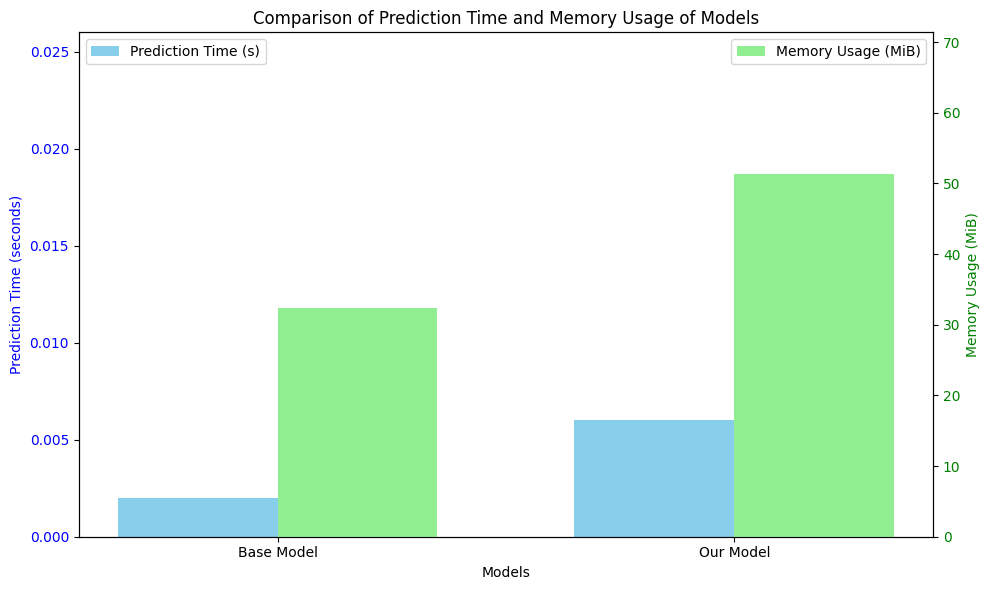

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Hypothetical data
model_names = ['Base Model', 'Our Model']
prediction_times = [0.002, 0.006]  # in seconds
memory_usages = [32.441, 51.394]  # in MiB

# Creating the bar chart
x = np.arange(len(model_names))  # the label locations
width = 0.35  # the width of the bars

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar for prediction times
rects1 = ax1.bar(x - width/2, prediction_times, width, label='Prediction Time (s)', color='skyblue')

# Make the y-axis label, ticks and tick labels match the first plot.
ax1.set_ylabel('Prediction Time (seconds)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_ylim(0, max(prediction_times) + 0.02)  # adding some margin

# Twin axis for memory usage
ax2 = ax1.twinx()
rects2 = ax2.bar(x + width/2, memory_usages, width, label='Memory Usage (MiB)', color='lightgreen')

ax2.set_ylabel('Memory Usage (MiB)', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.set_ylim(0, max(memory_usages) + 20)  # adding some margin

# General settings
ax1.set_xlabel('Models')
ax1.set_xticks(x)
ax1.set_xticklabels(model_names)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Comparison of Prediction Time and Memory Usage of Models')
plt.tight_layout()

# Save and show the plot
plt.savefig('../images/model_comparison_chart.png')
plt.show()


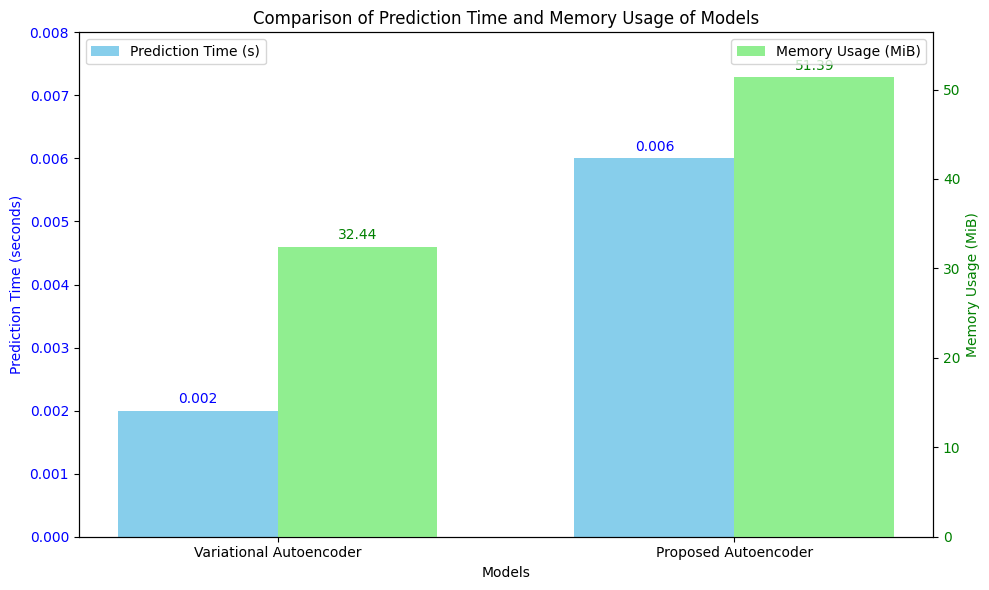

In [19]:
# Hypothetical data
model_names = ['Variational Autoencoder', 'Proposed Autoencoder']
prediction_times = [0.002, 0.006]  # in seconds
memory_usages = [32.441, 51.394]  # in MiB


# Updated code to include numbers on top of bars

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar for prediction times
rects1 = ax1.bar(x - width/2, prediction_times, width, label='Prediction Time (s)', color='skyblue')

# Annotate bars with prediction time values
for rect in rects1:
    height = rect.get_height()
    ax1.annotate(f'{height:.3f}',
                 xy=(rect.get_x() + rect.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom', color='blue')

# Twin axis for memory usage
ax2 = ax1.twinx()
rects2 = ax2.bar(x + width/2, memory_usages, width, label='Memory Usage (MiB)', color='lightgreen')

# Annotate bars with memory usage values
for rect in rects2:
    height = rect.get_height()
    ax2.annotate(f'{height:.2f}',
                 xy=(rect.get_x() + rect.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom', color='green')

# General settings
ax1.set_xlabel('Models')
ax1.set_xticks(x)
ax1.set_xticklabels(model_names)
ax1.set_ylabel('Prediction Time (seconds)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_ylim(0, max(prediction_times) + 0.002)  # adjusting margin
ax2.set_ylabel('Memory Usage (MiB)', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.set_ylim(0, max(memory_usages) + 5)  # adjusting margin

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Comparison of Prediction Time and Memory Usage of Models')
plt.tight_layout()

# Save and show the plot
# plt.savefig('/mnt/data/model_comparison_chart_with_numbers.png')
plt.savefig('../images/time_memory_comparison.png')
plt.show()


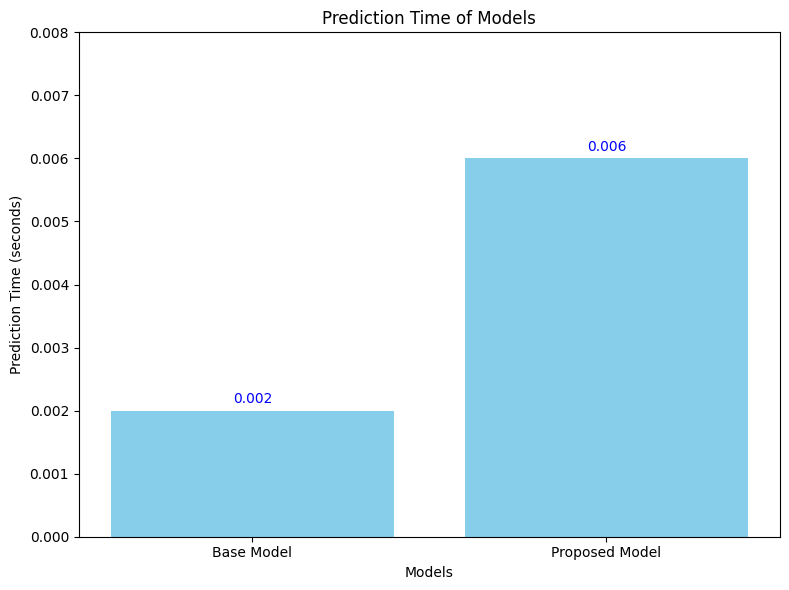

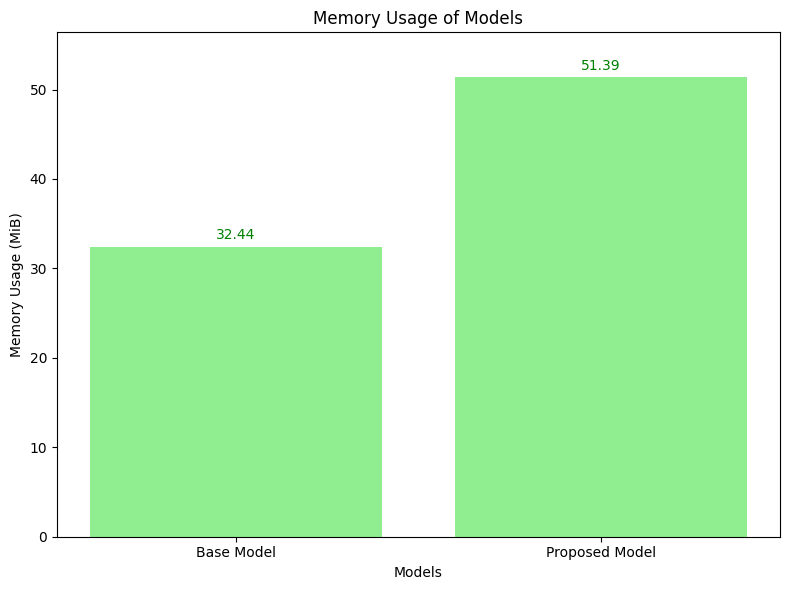

In [16]:
# Creating separate graphs for prediction time and memory usage

# Graph for Prediction Time
fig1, ax1 = plt.subplots(figsize=(8, 6))
rects1 = ax1.bar(model_names, prediction_times, color='skyblue')
ax1.set_title('Prediction Time of Models')
ax1.set_xlabel('Models')
ax1.set_ylabel('Prediction Time (seconds)')
ax1.set_ylim(0, max(prediction_times) + 0.002)  # adjusting margin

# Annotate bars with prediction time values
for rect in rects1:
    height = rect.get_height()
    ax1.annotate(f'{height:.3f}',
                 xy=(rect.get_x() + rect.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom', color='blue')

plt.tight_layout()
plt.savefig('../images/prediction_time_chart.png')
plt.show()

# Graph for Memory Usage
fig2, ax2 = plt.subplots(figsize=(8, 6))
rects2 = ax2.bar(model_names, memory_usages, color='lightgreen')
ax2.set_title('Memory Usage of Models')
ax2.set_xlabel('Models')
ax2.set_ylabel('Memory Usage (MiB)')
ax2.set_ylim(0, max(memory_usages) + 5)  # adjusting margin

# Annotate bars with memory usage values
for rect in rects2:
    height = rect.get_height()
    ax2.annotate(f'{height:.2f}',
                 xy=(rect.get_x() + rect.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom', color='green')

plt.tight_layout()
plt.savefig('../images/memory_usage_model.png')
# plt.close()

# (prediction_time_chart_path, memory_usage_chart_path)
plt.show()

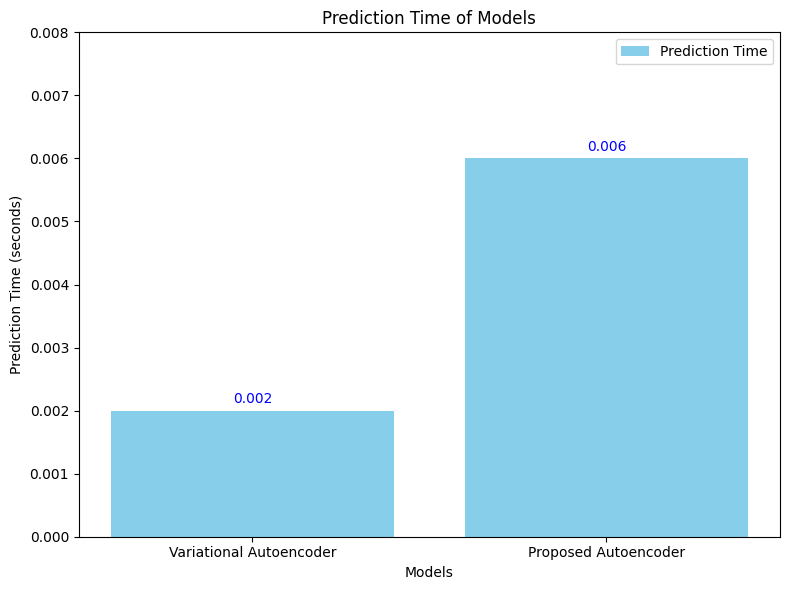

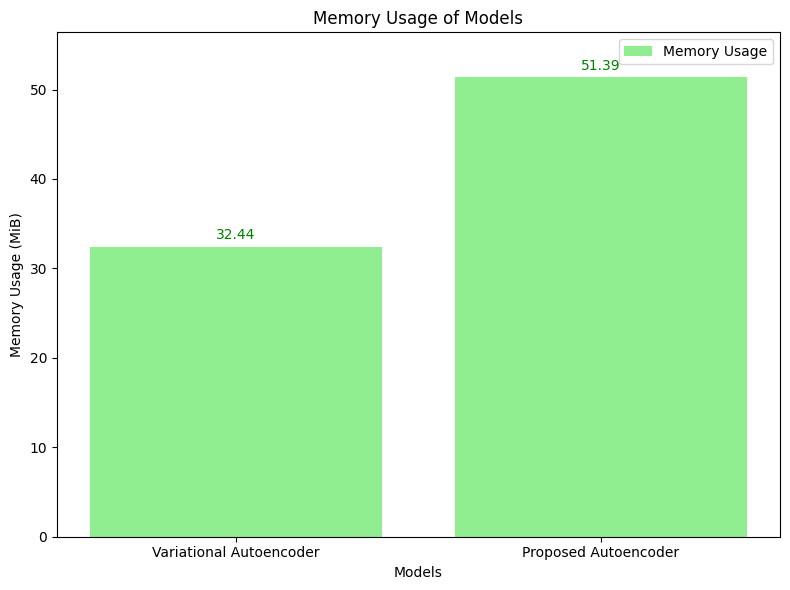

In [21]:
# Updated code to include legends in the graphs

# Graph for Prediction Time
fig1, ax1 = plt.subplots(figsize=(8, 6))
rects1 = ax1.bar(model_names, prediction_times, color='skyblue', label='Prediction Time')
ax1.set_title('Prediction Time of Models')
ax1.set_xlabel('Models')
ax1.set_ylabel('Prediction Time (seconds)')
ax1.set_ylim(0, max(prediction_times) + 0.002)  # adjusting margin
ax1.legend()

# Annotate bars with prediction time values
for rect in rects1:
    height = rect.get_height()
    ax1.annotate(f'{height:.3f}',
                 xy=(rect.get_x() + rect.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom', color='blue')

plt.tight_layout()
plt.savefig('../images/prediction_time_chart.png')
plt.show()

# Graph for Memory Usage
fig2, ax2 = plt.subplots(figsize=(8, 6))
rects2 = ax2.bar(model_names, memory_usages, color='lightgreen', label='Memory Usage')
ax2.set_title('Memory Usage of Models')
ax2.set_xlabel('Models')
ax2.set_ylabel('Memory Usage (MiB)')
ax2.set_ylim(0, max(memory_usages) + 5)  # adjusting margin
ax2.legend()

# Annotate bars with memory usage values
for rect in rects2:
    height = rect.get_height()
    ax2.annotate(f'{height:.2f}',
                 xy=(rect.get_x() + rect.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom', color='green')

plt.tight_layout()
plt.savefig('../images/memory_usage_chart.png')
# plt.close()

plt.show()
# (prediction_time_chart_path, memory_usage_chart_path)
